# Training a simple logistical regression model using statistical gradient descent

In [1]:
# import necessary libs
import matplotlib.pyplot as plt
import numpy as np

The perfect training cycle does not exists and training your model depends on the data you use for training.  
Yet the desired error rate would look like this:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


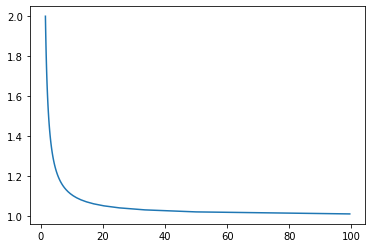

In [2]:
x = np.linspace(1, 2, 100)

f = lambda x: 1/np.log(x)
plt.plot(f(x), x)
plt.show()

Lets initialize a model and implement a training loop to apply GD on the regression model.

For simplification we use normal distributed data, stretched by a factor of $2$ and with the initial bias $b_0 = 4$ and the slope $b_1 = 3.5$.

In [3]:
n     = 200 # number of observations
bias  = 4
slope = 3.5

# inputs
x   = np.random.normal(0, 0.1, n) * 2
# target outputs
y   = bias + slope * x + np.random.normal(0, 0.1, n)
df  = np.array(x + y)
df.resize((2, n))

x_b = x.copy()
x_b.resize((2, n))
x_b[1,:] = 1

# this is a very important parameter
# if the lr is too low, or if it's too high the model might not converge
learning_rate = 0.05
n_iterations  = 2000 #  aka epochs
theta         = np.array([20, 20])

# structures to hold parameters from each training epoch
b0    = np.zeros(n_iterations)
b1    = np.zeros(n_iterations)
sse_i = np.zeros(n_iterations)

## Visualization of the dataset

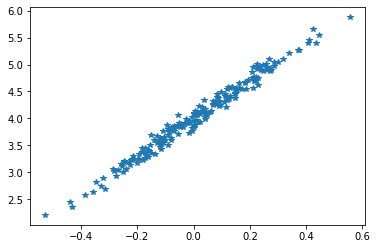

In [4]:
plt.plot(x, y, '*')

The training loop that calculates the mean square error for the gradients `gradients` as well as the local approximation error `sse_i`, then uses `gradients` to approximate new values of `theta`

In [5]:
iteration = 0
iter_gradients = list()
for iteration in range(n_iterations):
  yhat               = x_b.T @ theta          # predict using weights in theta
  residuals_b        = yhat - y                 # calculate the residuals
  gradients          = 2/n * (x_b @ residuals_b) # calculate the gradients of MSE w.r.t model weights 
  theta              = theta - learning_rate * gradients # update theta 
  
  iter_gradients.append(gradients)
  sse_i[iteration] = np.sum((y - (x_b.T @ theta))**2)
  b0[iteration]    = theta[1]
  b1[iteration]    = theta[0]


## Visualization of the results

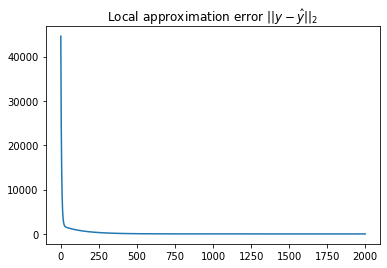

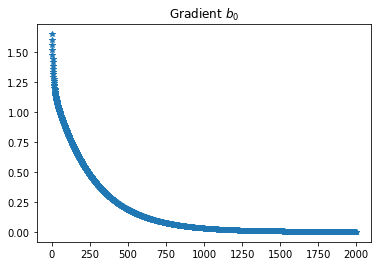

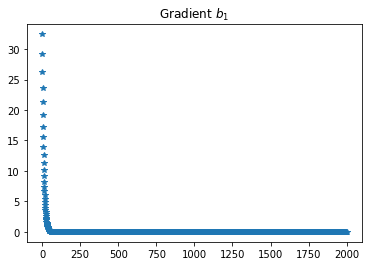

In [6]:
iter_gradients = np.array(iter_gradients)
plt.plot(sse_i)
plt.title('Local approximation error $|| y - \hat{y} ||_2$')
plt.show()

plt.plot(iter_gradients[:, 0], '*')
plt.title('Gradient $b_0$')
plt.show()

plt.plot(iter_gradients[:, 1], '*')
plt.title('Gradient $b_1$')
plt.show()

### Conclusion:
As you can see the desired graph and the resulting graph look quite similar. 

Since we can visualize that the model has been learning, let's check the results and build a prediction function to use our trained parameters.

In [9]:
def predict(x):
  x_ = np.zeros((2, len(x)))
  x_[0, :] = x
  x_[1, :] = 1
  return x_.T @ theta

val = np.random.normal(0, 0.1, 1)
out = predict(val)

print(f'{((bias + val * slope) - out)[0]} < 0.1 == {((bias + val * slope) - out)[0] < 0.1}')

0.014216048452229568 < 0.1 == True
